**Machine Learning Project: Spam Filter**


---


---







Step 1: Importing required libraries:


---


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Step 2: Reading data from csv file:

---







In [ ]:
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Step 3: Exploratory Data Analysis: 

---




In [ ]:
df.shape

(5572, 2)

In [ ]:
df.groupby("Category").describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

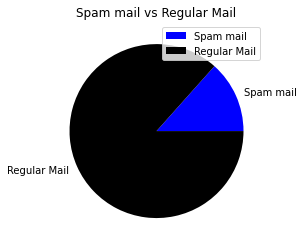

In [ ]:
spam = np.sum(df["Category"]=="spam")
ham = np.sum(df["Category"]=="ham")
p = np.array([spam,ham])
plt.pie(p, labels = ["Spam mail", "Regular Mail"], colors=["blue", "black"])
plt.legend()
plt.title("Spam mail vs Regular Mail")
plt.show()

Upon Analysis we observe that: <br>


*   The dataset contains 5572 rows and 2 columns
*   The dataset contains 747 spam mails and 4825 normal mails
*   There are no null values
*   There are 2 colums, Category and Object and both of them store object type values






Step 4: Data Preprocessing: 

---





In [ ]:
df["spam"]=df["Category"].apply(lambda x:1 if x=="spam" else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


Here we have converted the Category column into a numeric column since our algorithm only considers numeric values.

Step 5: Splitting the data for Training and Testing the model:

---




In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message,df.spam)

Data for training:

In [ ]:
X_train

4897         2 and half years i missed your friendship:-)
3419    LIFE has never been this much fun and great un...
1564       Get ready to put on your excellent sub face :)
1950                        Wait 2 min..stand at bus stop
1770    Ha... Both of us doing e same thing. But i got...
                              ...                        
456       Si si. I think ill go make those oreo truffles.
810       Ugh I don't wanna get out of bed. It's so warm.
1054       Jay's getting really impatient and belligerent
1108    From someone not to smoke when every time I've...
1567                        I am late. I will be there at
Name: Message, Length: 4179, dtype: object

In [ ]:
y_train

4897    0
3419    1
1564    0
1950    0
1770    0
       ..
456     0
810     0
1054    0
1108    0
1567    0
Name: spam, Length: 4179, dtype: int64

Data for testing:

In [ ]:
X_test

1077         Where can download clear movies. Dvd copies.
2786                               Yeah get the unlimited
1551    He says hi and to get your ass back to south t...
813     Congratulations ur awarded either £500 of CD g...
822                               On the road so cant txt
                              ...                        
2062    Hey ! I want you ! I crave you ! I miss you ! ...
4371    Do you want a new Video handset? 750 any time ...
4414    Sad story of a Man - Last week was my b'day. M...
66      Today is "song dedicated day.." Which song wil...
2281                           R ü comin back for dinner?
Name: Message, Length: 1393, dtype: object

In [ ]:
y_test

1077    0
2786    0
1551    0
813     1
822     0
       ..
2062    0
4371    1
4414    0
66      0
2281    0
Name: spam, Length: 1393, dtype: int64

Step 6: Further Data Preprocessing: 

---

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Here we have converted the message value from text to numeric to better suit our model

Step 7: Training the model:

---




In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

Step 8: Testing the model:

---





In [ ]:
emails = [
    'Good morning, when can we schedule the meeting?',
    'Upto 20% discount on new course from udemy, exclusive offer just for you. Dont miss this reward!',
    'Dear customer, your electricity bill is due on the 28th of July. Please click here to pay online.',
    'Congrats! You have just recieved an amazon reward worth 100000!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1, 0, 1])

Here 0 refers to normal mail and 1 refers to spam mail

In [ ]:
X = v.transform(X_test)
model.predict(X)

array([0, 0, 0, ..., 0, 0, 0])

Step 9: Checking accuracy:



---




In [ ]:
accuracy = model.score(X, y_test)*100
print("The accuracy of the model is:", accuracy)

The accuracy of the model is: 98.85139985642498




---



---


Automating the code using a pipeline for both count vectoring and naive bayes algorithm:

---



In [ ]:
from sklearn.pipeline import Pipeline
p = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

Fitting the model:

In [ ]:
p.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

Predicting:

In [ ]:
p.predict(emails)

array([0, 1, 0, 1])

In [ ]:
p.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

Checking accuracy:

In [ ]:
p.score(X_test, y_test)

0.9885139985642498



---

Implementing other classification algorithms:

---





*   SVM Classifier:



In [ ]:
from sklearn.svm import SVC 
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train_count, y_train)  

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred= classifier.predict(X)  

In [ ]:
accuracy = classifier.score(X, y_test)*100
print("The accuracy of the model is:", accuracy)

The accuracy of the model is: 98.63603732950466




*   Decision Tree Classifier:



In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train_count, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred= classifier.predict(X)  

In [ ]:
accuracy = classifier.score(X, y_test)*100
print("The accuracy of the model is:", accuracy)

The accuracy of the model is: 96.4824120603015
